In [1]:
%tensorflow_version 2.x 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.2.0


In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


In [6]:
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

8982 train sequences
2246 test sequences


In [7]:
num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

46 classes


In [8]:
print('Vectorizing sequence data...')
tokenizer = Tokenizer(num_words=10000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Vectorizing sequence data...
x_train shape: (8982, 10000)
x_test shape: (2246, 10000)


In [9]:
print('Convert class vector to binary class matrix for use with categorical_crossentropy')
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Convert class vector to binary class matrix for use with categorical_crossentropy
y_train shape: (8982, 46)
y_test shape: (2246, 46)


In [0]:
model = Sequential()
model.add(Dense(512, input_shape=(10000,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                23598     
_________________________________________________________________
activation_1 (Activation)    (None, 46)                0         
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


In [12]:
%%time
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',patience=3, verbose=1, mode='min', baseline=None, restore_best_weights=False)
callbacks = [early_stopping]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

CPU times: user 16.8 ms, sys: 0 ns, total: 16.8 ms
Wall time: 18.3 ms


In [13]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=callbacks)

Epoch 1/20
253/253 [==============================] - 9s 34ms/step - loss: 1.2853 - accuracy: 0.7214 - val_loss: 0.9854 - val_accuracy: 0.7820
Epoch 2/20
253/253 [==============================] - 8s 34ms/step - loss: 0.4806 - accuracy: 0.8910 - val_loss: 0.8580 - val_accuracy: 0.8154
Epoch 3/20
253/253 [==============================] - 8s 33ms/step - loss: 0.2739 - accuracy: 0.9358 - val_loss: 0.9179 - val_accuracy: 0.8042
Epoch 4/20
253/253 [==============================] - 8s 33ms/step - loss: 0.2206 - accuracy: 0.9488 - val_loss: 0.9556 - val_accuracy: 0.8076
Epoch 5/20
253/253 [==============================] - 8s 33ms/step - loss: 0.1986 - accuracy: 0.9534 - val_loss: 1.0159 - val_accuracy: 0.8053
Epoch 00005: early stopping


In [14]:
score = model.evaluate(x_test, y_test, batch_size=32, verbose=1)
print('Test loss: {:4f}\nTest Accuracy: {:4f}'.format(score[0], score[1]))

71/71 [==============================] - 1s 10ms/step - loss: 0.9656 - accuracy: 0.8023
Test loss: 0.965647
Test Accuracy: 0.802315


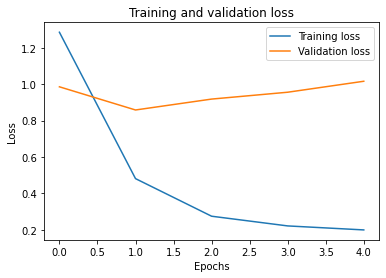

In [15]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

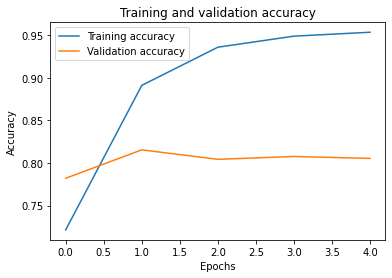

In [16]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()